# Logistic Regression Implementation

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('train.csv')
dtest = pd.read_csv('test.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
print(X_train)

[[5.310e+02 0.000e+00 1.100e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [7.640e+02 1.000e+00 1.200e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.812e+03 1.000e+00 1.300e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 ...
 [1.190e+03 0.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.191e+03 0.000e+00 2.400e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [7.060e+02 0.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]]


In [32]:
print(y_train)

[2 2 3 ... 3 0 1]


In [33]:
print(X_test)

[[1.454e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]
 [1.092e+03 1.000e+00 5.000e-01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.524e+03 1.000e+00 1.800e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [1.759e+03 1.000e+00 1.400e+00 ... 1.000e+00 1.000e+00 0.000e+00]
 [5.140e+02 1.000e+00 1.600e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.410e+03 1.000e+00 5.000e-01 ... 1.000e+00 1.000e+00 0.000e+00]]


In [34]:
print(y_test)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 3 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 2 3 3 3 3 2 0 1 1 2 1 3 1 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 0 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 0 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 2 0 1 3 0 2 2 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 2 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 3 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 1 2 0 0 1 3 0
 3 0 0 2 2 0 1 3 0 3 2 1 

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
print(X_train)

[[-1.58954736 -0.97628121 -0.54409463 ... -1.77951304  1.01072417
  -1.02840321]
 [-1.06204271  1.02429504 -0.42202734 ...  0.56195149  1.01072417
  -1.02840321]
 [ 1.31059626  1.02429504 -0.29996004 ...  0.56195149  1.01072417
   0.97238125]
 ...
 [-0.09759213 -0.97628121  0.55451104 ... -1.77951304 -0.98938962
   0.97238125]
 [-0.09532817 -0.97628121  1.04278023 ...  0.56195149  1.01072417
   0.97238125]
 [-1.19335288 -0.97628121 -1.27649842 ...  0.56195149 -0.98938962
   0.97238125]]


In [37]:
print(X_test)

[[ 0.50009554  1.02429504 -1.27649842 ...  0.56195149  1.01072417
  -1.02840321]
 [-0.31946105  1.02429504 -1.27649842 ... -1.77951304  1.01072417
  -1.02840321]
 [ 0.65857334  1.02429504  0.31037645 ...  0.56195149 -0.98938962
   0.97238125]
 ...
 [ 1.19060593  1.02429504 -0.17789274 ...  0.56195149  1.01072417
  -1.02840321]
 [-1.62803483  1.02429504  0.06624185 ...  0.56195149  1.01072417
   0.97238125]
 [ 0.40048093  1.02429504 -1.27649842 ...  0.56195149  1.01072417
  -1.02840321]]


## Training the Logistic Regression model on the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predicting the Test set results

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3 3]
 [0 0]
 [2 2]
 [1 2]
 [3 2]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [0 1]
 [3 3]
 [0 0]
 [2 2]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [2 1]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [1 2]
 [2 2]
 [3 3]
 [1 1]
 [3 3]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [0 0]
 [2 1]
 [3 3]
 [0 0]
 [0 0]
 [3 3]
 [3 3]
 [3 3]
 [2 1]
 [3 3]
 [3 3]
 [1 1]
 [3 3]
 [0 0]
 [2 1]
 [3 3]
 [2 1]
 [1 1]
 [3 3]
 [0 0]
 [3 3]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [0 0]
 [3 3]
 [3 3]
 [1 1]
 [3 3]
 [2 2]
 [2 1]
 [3 2]
 [3 3]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [2 1]
 [1 2]
 [3 3]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [1 2]
 [3 3]
 [1 1]
 [2 2]
 [2 2]
 [0 1]
 [0 0]
 [3 3]
 [3 3]
 [3 3]
 [0 0]
 [3 3]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [3 3]
 [1 2]
 [3 2]
 [3 3]
 [2 2]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [2 1]
 [3 3]
 [3 3]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [1 2]
 [1 1]
 [3 3]
 [3 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [1 2]
 [0 0]
 [0 1]
 [1 1]
 [2 2]
 [1 1]

## Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[124   0   0   0]
 [ 13  72  25   0]
 [  0  27  90   8]
 [  0   0   0 141]]


0.854

# Visualising Confusion matrix

Text(69.0, 0.5, 'Truth')

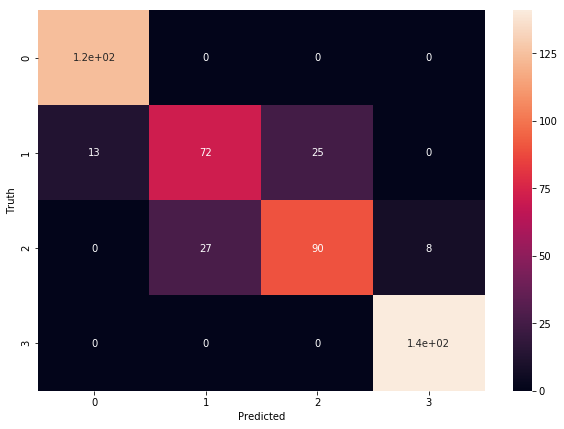

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Applying k-Fold Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Defau

Accuracy: 81.92 %
Standard Deviation: 2.37 %
